# Задача 1.

Для заданной выборки:
1) постройте статистический ряд, предварительно определив число интервалов с помощью
формулы Стерджесса;
2) постройте гистограмму;
3) найдите значения точечных оценок математического ожидания и дисперсии;
4) на основе анализа результатов наблюдений выдвинете гипотезу о виде закона
распределения наблюдаемой случайной величины;
5) с помощью критерия хи-квадрат проверьте гипотезу, сформулированную в п.4;
6) предполагая, что выборка порождена гауссовской случайной величиной, постройте
доверительные интервалы уровня надёжности 0.95 для математического ожидания и
дисперсии наблюдаемой случайной величины.

Импортируем нужные библиотеки.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, t

Выборка:

In [2]:
data = np.array([
    46.0, 120.0, 122.5, 93.5, 69.5, 102.5, 76.5, 37.5, 22.5, 77.0,  
    107.0, 123.0, 48.5, 78.5, 108.5, 127.5, 51.5, 80.0, 112.5, 131.5,  
    53.0, 81.5, 113.5, 132.0, 54.6, 82.0, 116.0, 134.0, 57.5, 83.0,  
    117.0, 66.5, 84.0, 118.5, 68.0, 91.5, 119.0, 38.5, 66.0, 43.5,  
    60.5, 91.5, 39.0, 65.5, 137.5, 40.5, 99.5, 52.5, 143.0, 89.5,  
    94.5, 80.5, 79.0, 62.0, 87.5, 97.5, 62.5, 64.0, 23.5, 78.5,  
    61.0, 98.0, 62.5, 97.5, 70.0, 65.5, 71.5, 99.0, 72.5, 63.5,  
    47.0, 77.0, 76.5, 64.0, 63.5, 56.5, 77.0, 63.5, 72.0, 66.0,  
    87.6, 66.5, 55.0, 108.5, 99.0, 110.0, 86.6, 88.0, 66.0, 105.5
])

Посчитаем количество чисел, минимальное и максимальное значение.

In [3]:
n = len(data)
min_value = min(data)
max_value = max(data)

print(f"Количество элементов: {n}.")
print(f"Минимальное значение: {min_value}.")
print(f"Максимальное значение: {max_value}.")

Количество элементов: 90.
Минимальное значение: 22.5.
Максимальное значение: 143.0.


Определим число интервалов по формуле Стерджесса:

In [4]:
k = math.ceil(1 + np.log2(n))
print(f"Число интервалов: {k}")

Число интервалов: 8


Сделаем интервалы:

In [5]:
intervals = np.linspace(min_value, max_value, k + 1)

Посчитаем частоту:

In [6]:
frequency = np.zeros(k)

for value in data:
    for i in range(k):
        if intervals[i] <= value <= intervals[i + 1]:
            frequency[i] += 1
            break

### Построим статистический ряд на интервалах.

In [7]:
for i in range(k):
    low = intervals[i]
    high = intervals[i + 1]
    freq = int(frequency[i])
    print(f"({low:.3f},\t{high:.3f}):\t{freq}")

(22.500,	37.562):	3
(37.562,	52.625):	9
(52.625,	67.688):	22
(67.688,	82.750):	18
(82.750,	97.812):	13
(97.812,	112.875):	11
(112.875,	127.938):	9
(127.938,	143.000):	5


### Нарисуем гистограмму.

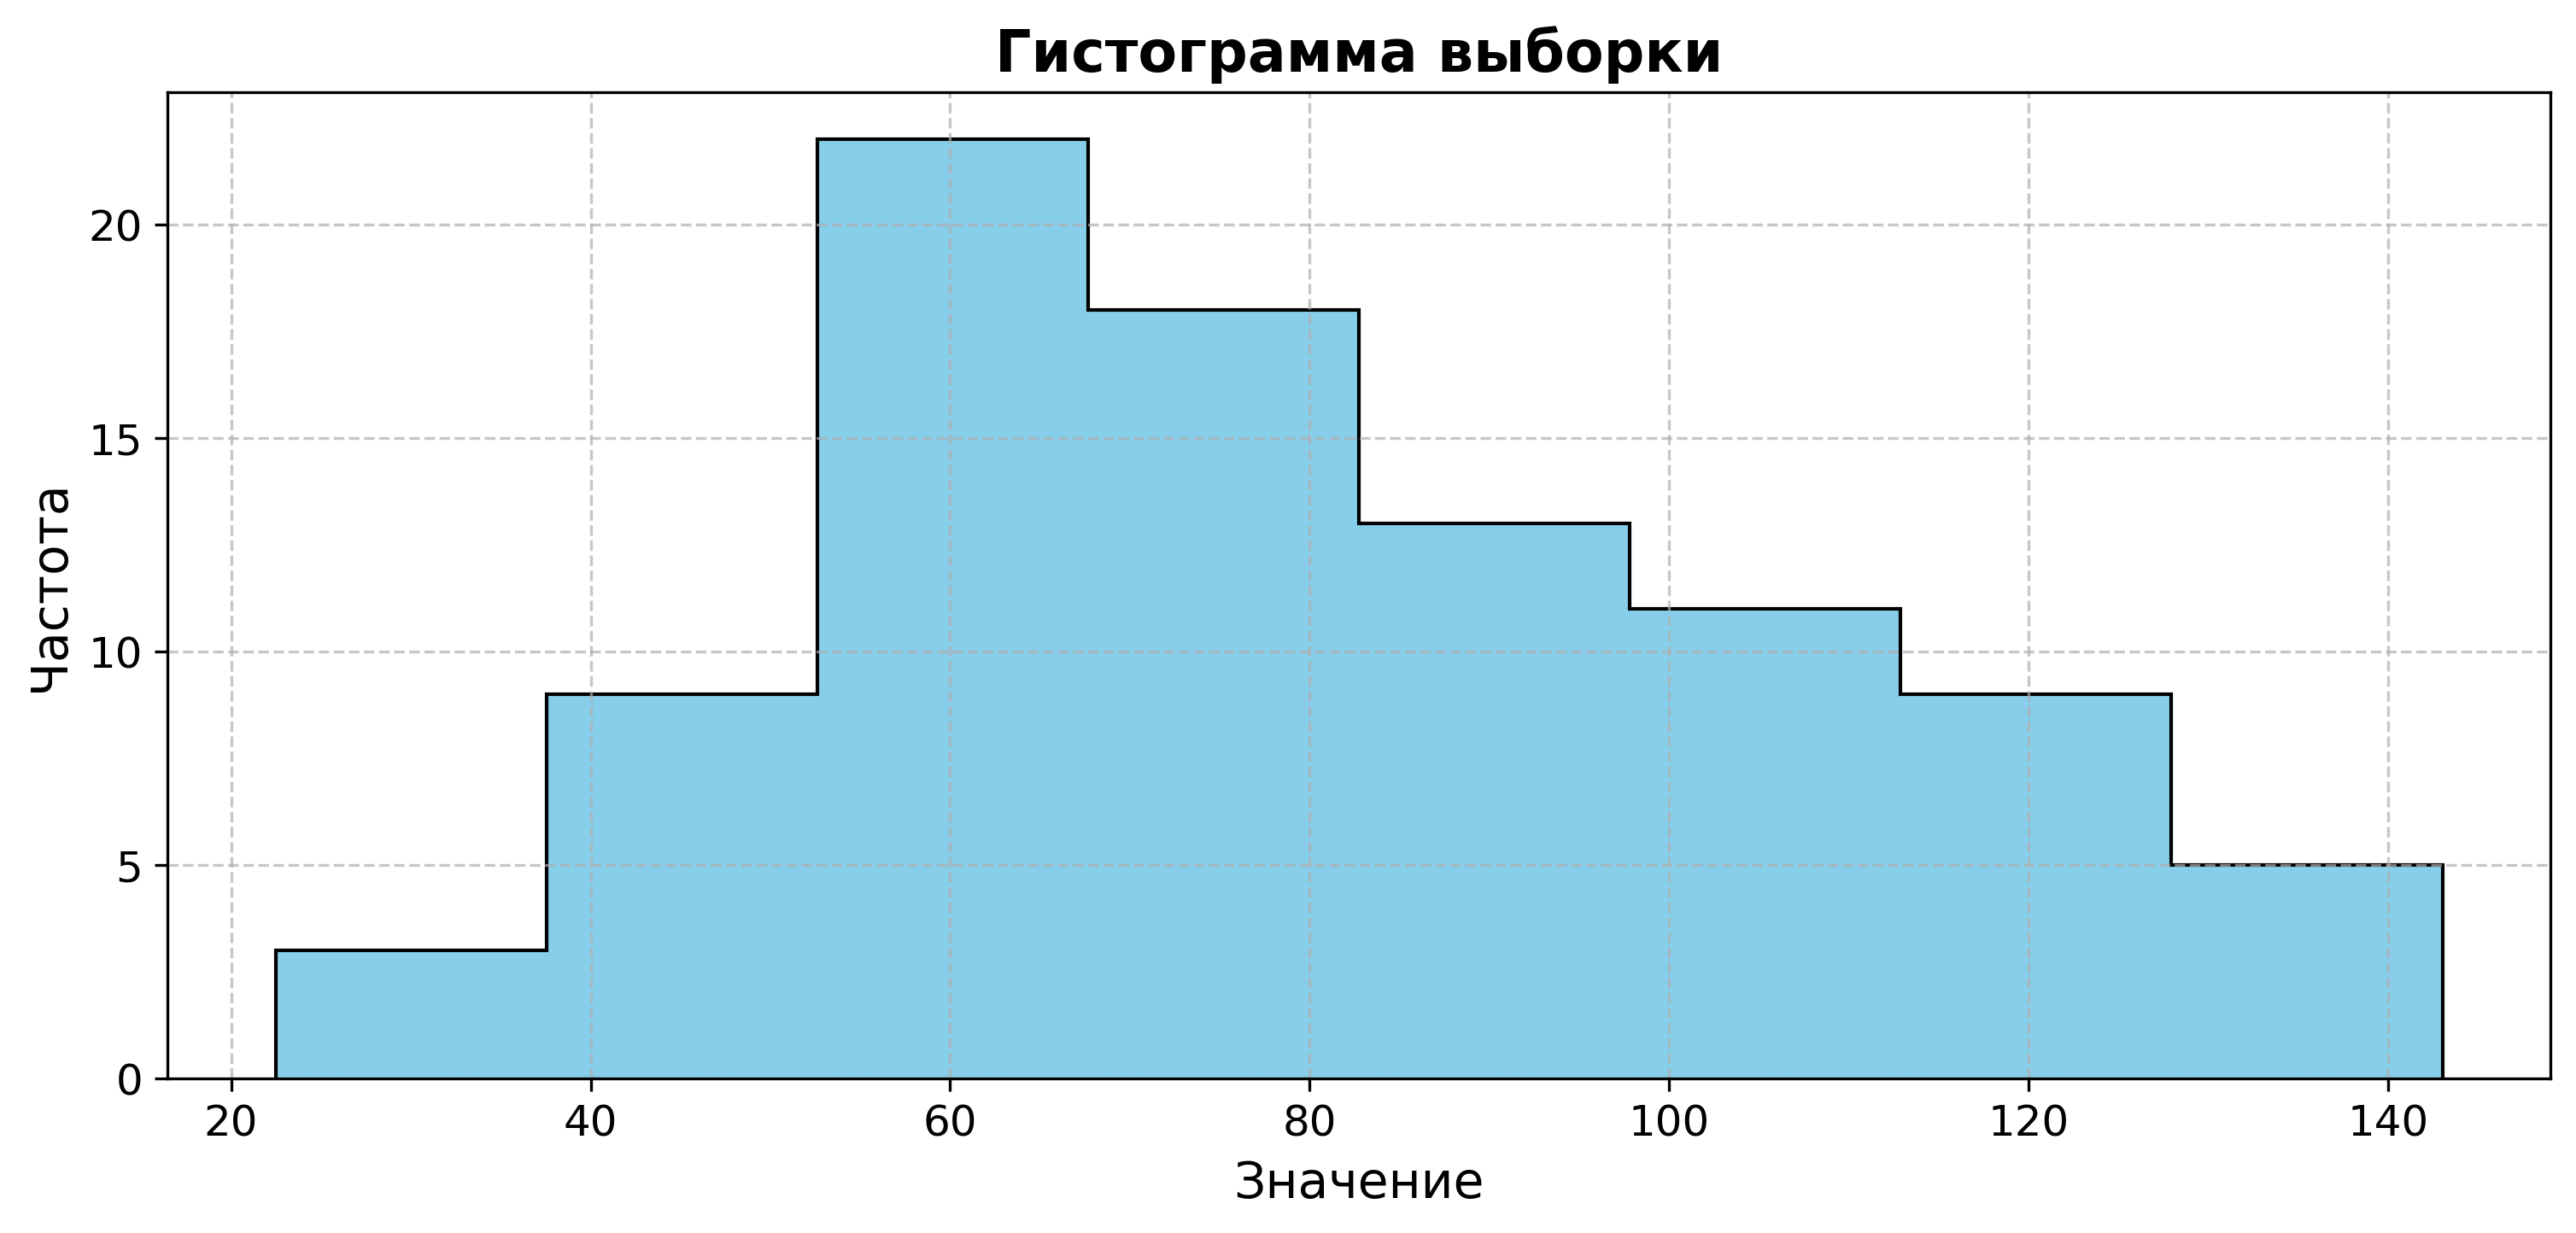

In [10]:
plt.figure(figsize=(12, 5), dpi=300)
plt.stairs(frequency, intervals, fill=True, color='skyblue', edgecolor='black', linewidth=1)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Значение', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма выборки', fontsize=16, fontweight='bold')
plt.show()

Найдём математическое ожидание и смещённую дисперсию выборки.

In [11]:
mean_sample = np.sum(data) / n
var_sample = np.sum(np.fromiter(((i - mean_sample)**2 for i in data), dtype=float)) / (n - 1)

print(f"Математическое ожидание выборки: {mean_sample:.2f}.")
print(f"Дисперсия выборки: {var_sample:.2f}.")

Математическое ожидание выборки: 81.12.
Дисперсия выборки: 738.08.


### Распределение похоже на нормальное

$H_0: X ~ N(\mu, \sigma^2)$

$H_1: X$ not ~ $N(\mu, \sigma^2)$

### Проверим гипотезу с помощью критерия Хи-квадрата.

H<sub>0</sub>: распределение соответствует нормальному распределению.\
H<sub>A</sub>: распределение не соответствует нормальному.

Найдём ожидаемые значения для нормального распределения, после чего посчитаем хи-квадрат статистику.\
Степень свободы считаем по формуле $k - 1 - m$, где $k$ - количество интервалов, $m$ - количество оценочных параметров (в данном задаче их 2 - мат. ожидание и дисперсия).\
Уровень значимости $\alpha = 0.05$.\
Посчитаем критическое значение хи-квадрата.

In [12]:
expected_frequency = []

for i in range(k):
    low = intervals[i]
    high = intervals[i + 1]
    p = norm.cdf(high, mean_sample, np.sqrt(var_sample)) - norm.cdf(low, mean_sample, np.sqrt(var_sample))
    expected_frequency.append(p * n)

chi_square_statistic = np.sum((frequency - expected_frequency) ** 2 / expected_frequency)

df = k - 1 - 2

alpha = 0.05
critical = chi2.ppf(1 - alpha, df)

print(f"Chi-square statistic: {chi_square_statistic:.4f}")
print(f"Critical value: {critical:.4f}")

if chi_square_statistic > critical:
    print("Гипотеза H_0 отвергается. Распределение не является нормальным.")
else:
    print("Гипотеза H_0 не отвергается. Распределение может быть нормальным.")

Chi-square statistic: 8.1693
Critical value: 11.0705
Гипотеза H_0 не отвергается. Распределение может быть нормальным.


Гипотеза $H_0$ отвергается на уровне значимости $\alpha = 0.05$.

### Построим доверительный интервал уровня надёжности $\lambda = 0.95$ для математического ожидания и дисперсии.

#### 1. Доверительный интервал для математического ожидания.

Формула доверительного интервала: $(\overline{X} - t_{1 - \frac{\alpha}{2}, n - 1} \cdot \frac{s}{\sqrt{n}},\ \overline{X} + t_{1 - \frac{\alpha}{2}, n - 1} \cdot \frac{s}{\sqrt{n}})$

In [13]:
lambda_ = 0.95
alpha = 1 - lambda_

In [14]:
s = np.sqrt(var_sample)
t_crit = t.ppf(1 - alpha / 2, df=n-1)

left_mean = mean_sample - t_crit * s / np.sqrt(n)
right_mean = mean_sample + t_crit * s / np.sqrt(n)

print(f"ДИ для математического ожидания: ({left_mean:.4f}, {right_mean:.4f})")

ДИ для математического ожидания: (75.4299, 86.8101)


#### 2. Доверительный интервал для дисперсии.

Формула доверительного интервала: $(\frac{(n - 1) \cdot \hat{\sigma}^2}{\Chi_{1 - \frac{\alpha}{2}, n - 1}^2},\ \frac{(n - 1) \cdot \hat{\sigma}^2}{\Chi_{\frac{\alpha}{2}, n - 1}^2})$

In [225]:
left_var = (n - 1) * var_sample / chi2.ppf(1 - alpha / 2, df=n-1)
right_var = (n - 1) * var_sample / chi2.ppf(alpha / 2, df=n-1)

print(f"ДИ для дисперсии: ({left_var:.4f}, {right_var:.4f})")

ДИ для дисперсии: (561.4976, 1013.8243)


Итого, получаем, доверительные интервалы для:

1. Мат. ожидания: $(75.4299, 86.8101)$
2. Дисперсии: $(561.4976, 1013.8243)$

# Задача 2.

Сгенерируйте выборку объёма 50 из распределения F(x), соответствующего вашему
варианту. Постройте гистограмму с 6 столбцами для полученной выборки. Сгенерируйте
выборку объёма 500 из того же распределения и постройте гистограмму с 10 столбцами
для неё. Опишите метод моделирования выборки соответствующей распределению F(x).
Применяя критерий хи-квадрат для простой гипотезы, проверьте гипотезу о том, что
выборки объёма 50 и 500 соответствуют сгенерированному распределению. По большой
и малой выборкам проверьте гипотезу о том, что математическое ожидание наблюдаемой
СВ равно $m_0$. Проведите сравнение полученных результатов. Если имеются различия,
попытайтесь их описать и объяснить.

In [231]:
n1 = 50
k1 = 6

n2 = 500
k2 = 10

m0 = 2

np.random.seed(42)

Функция распределения:

In [227]:
def F(x):
    if x < 1:
        return 0
    return 1 - 1 / x**2

Для генерации выборки используем метод обратной функции. Найдём её:

$y = 1 - \frac{1}{x^2}$

$1 - y = \frac{1}{x^2}$

$x^2 = \frac{1}{1 - y}$

$x = \sqrt{\frac{1}{1 - y}}$

$x = \frac{1}{\sqrt{1 - y}}$

In [156]:
def F_inverse(y):
    return 1 / np.sqrt(1 - y)

Функция для генерации $n$ чисел:

In [187]:
def generate_data(n):
    y = np.random.uniform(0, 1, n)
    data = F_inverse(y)
    return data

Функция создания интервалов и подсчёта их частот:

In [188]:
def intervals_and_frequency(data, k):
    min_value = min(data)
    max_value = max(data)
    intervals = np.linspace(min_value, max_value, k + 1)

    frequency = np.zeros(k) 

    for value in data:
        for i in range(k):
            if intervals[i] <= value <= intervals[i + 1]:
                frequency[i] += 1
                break

    return intervals, frequency

Функция отрисовки гистограммы:

In [189]:
def histogram(intervals, frequency, count, number):
    plt.subplot(1, 2, number)
    plt.stairs(frequency, intervals, fill=True, color='skyblue', edgecolor='black', linewidth=1)

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.xlabel('Значение', fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.title(f'Гистограмма выборки при n = {count}', fontsize=16, fontweight='bold')

Генерируем данные для маленькой $(n = 50)$ и большой выборки $(n = 500)$.

In [232]:
small_data = generate_data(n1)
big_data = generate_data(n2)

Нарисуем гистограммы:

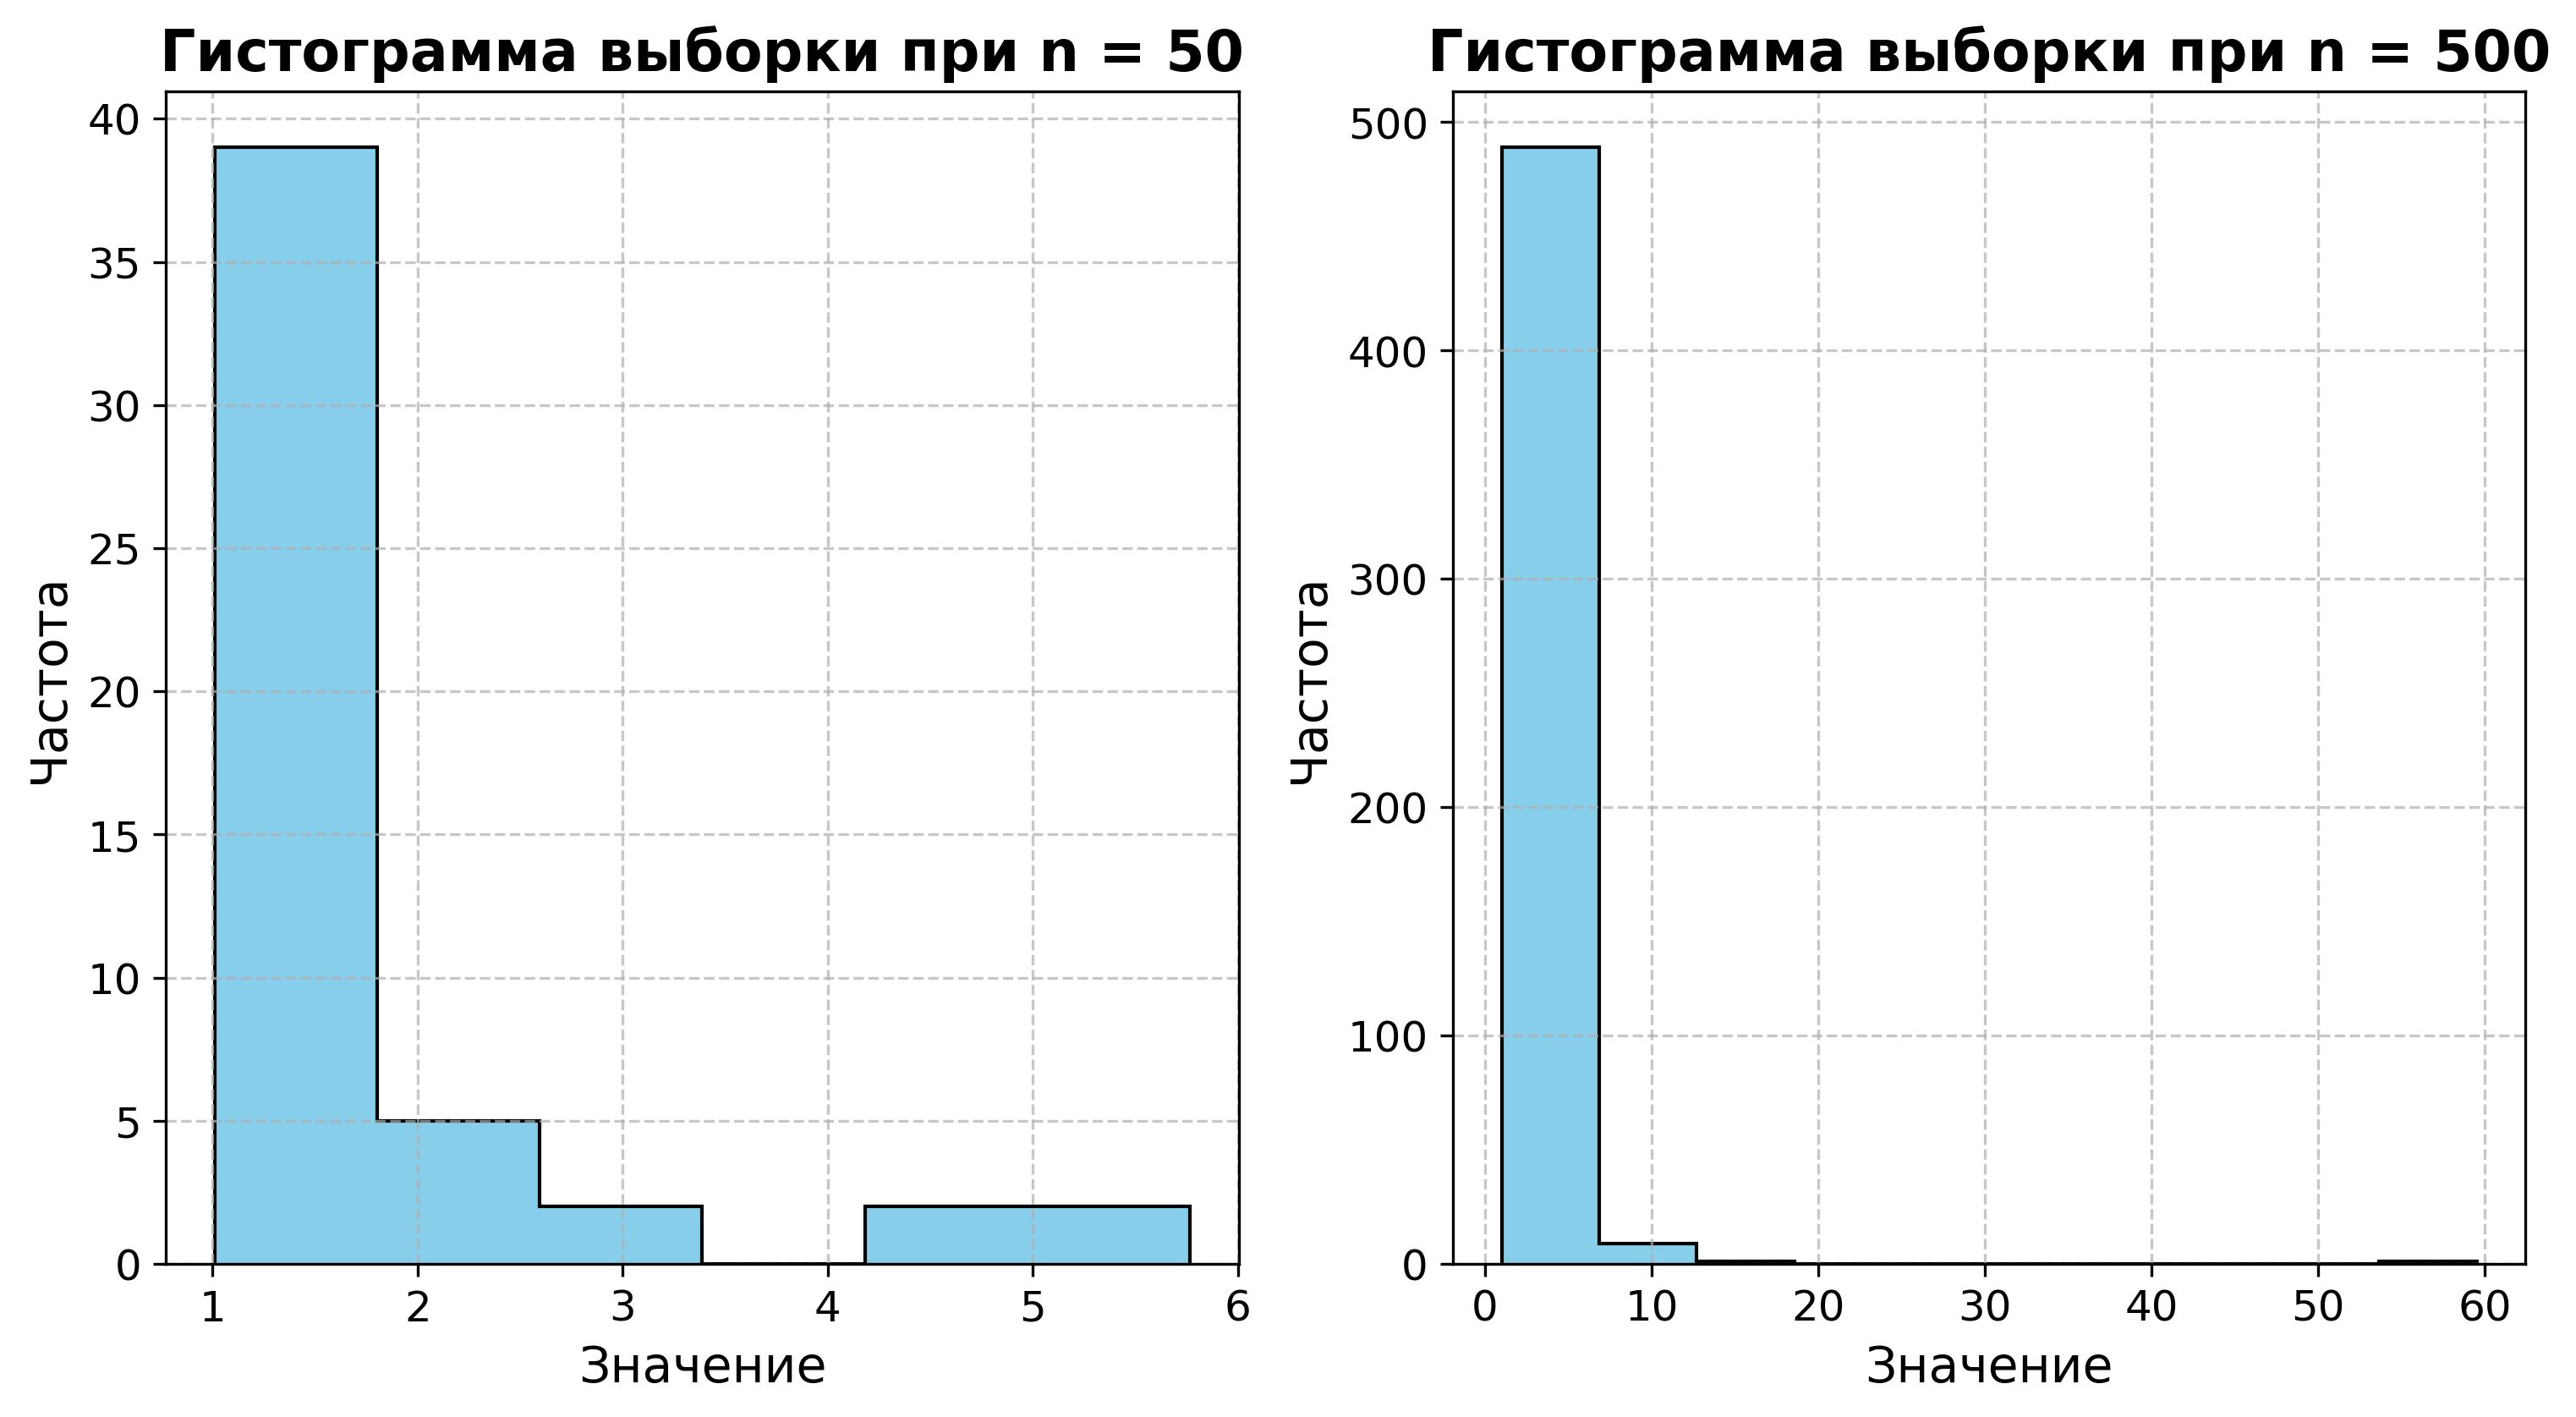

In [233]:
plt.figure(figsize=(12, 6), dpi=300)

intervals_1, frequency_1 = intervals_and_frequency(small_data, k1)
histogram(intervals_1, frequency_1, n1, 1)

intervals_2, frequency_2 = intervals_and_frequency(big_data, k2)
histogram(intervals_2, frequency_2, n2, 2)

plt.show()

### Проверим гипотезу, что выборки соответствуют заданному распределению:

$H_0$: Распределение соответствует теоретическому.\
$H_A$: Распределение не соответствует теоретическому.

Используем критерий Хи-квадрата. Практически аналогично задаче 1. Только вместо номрального распределения подставляем значения в заданную формулу распределения. 

Функция для проверки гипотезы:

In [ ]:
def chi_square_test(intervals, frequency, n):    
    expected_frequency = []
    
    for i in range(len(intervals) - 1):
        low = intervals[i]
        high = intervals[i + 1]
        
        p_low = F(low)
        p_high = F(high)
        
        expected_frequency.append((p_high - p_low) * n)

    chi_square_statistic = np.sum((frequency - expected_frequency) ** 2 / expected_frequency)
    
    df = len(intervals) - 1
    
    alpha = 0.05
    critical = chi2.ppf(1 - alpha, df)
    
    print(f"Chi-square statistic: {chi_square_statistic:.4f}")
    print(f"Critical value: {critical:.4f}")
    
    if chi_square_statistic > critical:
        print("Гипотеза H_0 отвергается. Распределение не соответствует теоретическому.")
    else:
        print("Гипотеза H_0 не отвергается. Распределение может соответствовать теоретическому.")

Запустим функцию для обеих выборок:

In [234]:
chi_square_test(intervals_1, frequency_1, n1)
print()
chi_square_test(intervals_2, frequency_2, n2)

Chi-square statistic: 9.6879
Critical value: 12.5916
Гипотеза H_0 не отвергается. Распределение может соответствовать теоретическому.

Chi-square statistic: 30.6592
Critical value: 18.3070
Гипотеза H_0 отвергается. Распределение не соответствует теоретическому.


### Проверим гипотезу, что математическое ожидание наблюдаемой СВ равно $m_0$:

$H_0$: Математическое ожидание СВ равно $m_0$.\
$H_A$: Математическое ожидание СВ не равно $m_0$.

Используем t-критерий Стьюдента.

Найдём математическое ожидание и дисперсию выборки, после чего посчитаем t-статистику и критическое значение.

Функция для проверки гипотезы:

In [208]:
def t_test(sample, m0, alpha=0.05):
    n = len(sample)
    mean_sample = np.mean(sample)
    var_sample = np.var(sample, ddof=1)
    
    t_statistic = (mean_sample - m0) / (np.sqrt(var_sample) / np.sqrt(n))
    df = n - 1
    
    critical = t.ppf(1 - alpha / 2, df)
    
    print(f"t-статистика: {t_statistic:.4f}")
    print(f"Критическое значение: {critical:.4f}")
    
    if abs(t_statistic) > critical:
        print("Гипотеза H_0 отвергается: математическое ожидание отличается от m0.")
    else:
        print("Гипотеза H_0 не отвергается: математическое ожидание может быть равно m0.")


Запустим функцию для обеих выборок:

In [236]:
t_test(small_data, m0)
print()
t_test(big_data, m0)

t-статистика: -1.7608
Критическое значение: 2.0096
Гипотеза H_0 не отвергается: математическое ожидание может быть равно m0.

t-статистика: 0.7807
Критическое значение: 1.9647
Гипотеза H_0 не отвергается: математическое ожидание может быть равно m0.


### Анализ результатов

#### 1. Проверка соответствия выборки теоретическому распределению 

- Малая выборка $(n = 50)$:
  - Статистика: $9.6879$  
  - Критическое значение: $12.5916$
  - Гипотеза **не отвергается** --> выборка может соответствовать теоретическому распределению.  

- Большая выборка $(n = 500)$: 
  - Статистика: $30.6592$
  - Критическое значение: $18.3070$
  - Гипотеза **отвергается** --> выборка не соответствует теоретическому распределению.  


- Маленькая выборка может не давать достаточно информации для точного сравнения с заданным распределением, из-за чего критерий хи-квадрат может не выявить значимых отклонений.  
- В большой выборке разница становится более явной, и отклонение от заданного распределения становится более заметным.  

##### Возможные причины отклонений в большой выборке: 
- Неточная генерация чисел.  
- Распределение $F(x)$ может быть приближением, а не точной моделью.

#### 2. Проверка гипотезы о математическом ожидании

- Малая выборка $(n = 50)$:
  - t-статистика: $-1.9004$
  - Критическое значение: $2.0096$
  - Гипотеза **не отвергается** --> математическое ожидание может быть равно $m_0 = 2$.  

- Большая выборка $(n = 500)$: 
  - t-статистика: $-1.5124$
  - Критическое значение: $1.9647$
  - Гипотеза **не отвергается** --> математическое ожидание может быть равно $m_0 = 2$.  

- В маленькой выборке среднее значение почти не отклоняется от $m_0 = 2$, поэтому гипотеза не отвергается.  
- В большой выборке среднее становится чуть дальше от $m_0$, гипотеза не отвергается.  
- Это подтверждает, что выборочное среднее является хорошей оценкой истинного математического ожидания.  

### Общие выводы и объяснение различий

1. Для малой выборки хи-квадрат тест не отвергнул гипотезу соответствия распределению, но отвергнул для большой. В большой выборке выбросы появляются чаще и это становятся более заметно, чем в маленькой выборке, из-за этого такой результат.

2. Гипотеза о математическом ожидании не отвергнута для обеих выборок. Среднее значение выборки стабильно и соответствует ожидаемому значению, равного $2$.  

3. Хи-квадрат отверг гипотезу о распределении для большой выборки, но t-критерий Стюдента показал, что математическое ожидание соответствует заданному. Это может означать, что распределение немного отличается, например, на краях, но в целом оно сохраняет правильное среднее значение.